In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

fn_temp = '2020-11-16T12_00_00_Daily_temp_2020_AdriaticSea_Z10_CF.nc' # THETAO all daily June 10 days and depths
nut_ds = xr.open_dataset(os.path.join(fn_temp))

nut_ds

<xarray.Dataset>
Dimensions:  (depth: 10, lat: 216, lon: 241, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-11-16T12:00:00
  * depth    (depth) int64 5 10 20 40 100 200 300 400 500 1000
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Data variables:
    thetao   (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.8
    bulletin_type:                   forecast
    comment:                         Please check in CMEMS catalogue the INFO...
    bulletin_date:                   20210608
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    contact:                         servicedesk.cmems@mercator-ocean.eu
    title:                           Potential Temperature (3D) - Daily Mean
    history:                         Data extracted from dataset http://local...
    FROM_ORIGINAL_FILE__field_type:  daily_mean_centered_at_time_field
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    source:                          MFS EAS6

In [4]:
#define the variables

import cartopy.crs as ccrs
import cartopy.feature as cfeature

lon_name   = nut_ds.lon[:]
lat_name   = nut_ds.lat[:]
time_name  = 'time'
depth_name = 'depth'
temp       = nut_ds.thetao[:]




In [5]:
#Extract a slice of the data

t = temp.isel(time=0,depth=0).sel(lat=slice(37, 46), lon=slice(12, 22))


In [6]:
t

<xarray.DataArray 'thetao' (lat: 216, lon: 241)>
array([[20.445539, 20.218768, 20.050018, ...,       nan,       nan,       nan],
       [20.34039 , 20.147732, 20.003428, ...,       nan,       nan,       nan],
       [20.316383, 20.146131, 20.057771, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
    time     datetime64[ns] 2020-11-16T12:00:00
    depth    int64 5
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    _ChunkSizes:    [  1  29  76 258]

In [7]:
#  coastlines, and adding features

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'], color ='w')

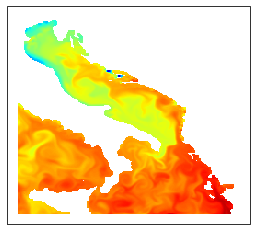

In [8]:
m = plt.axes(projection=ccrs.PlateCarree())

f1 = plt.pcolormesh(lon_name,lat_name,np.ma.masked_invalid(t), shading='flat', vmin=11, vmax=23, cmap=plt.cm.jet)  


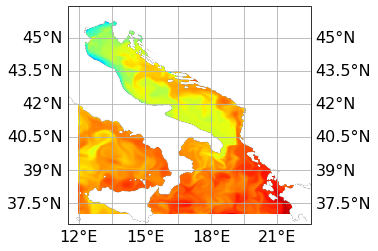

<Figure size 6000x6000 with 0 Axes>

In [9]:
m = plt.axes(projection=ccrs.PlateCarree())
f1 = plt.pcolormesh(lon_name,lat_name,np.ma.masked_invalid(t), shading='flat', vmin=11, vmax=23, cmap=plt.cm.jet)  


m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'k'}
g1.ylabel_style = {'size': 16, 'color': 'k'}


fig = plt.figure(figsize=(20, 20), dpi=300)


plt.show()



In [10]:
land_resolution = '10m'
land_def = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'], color ='g')

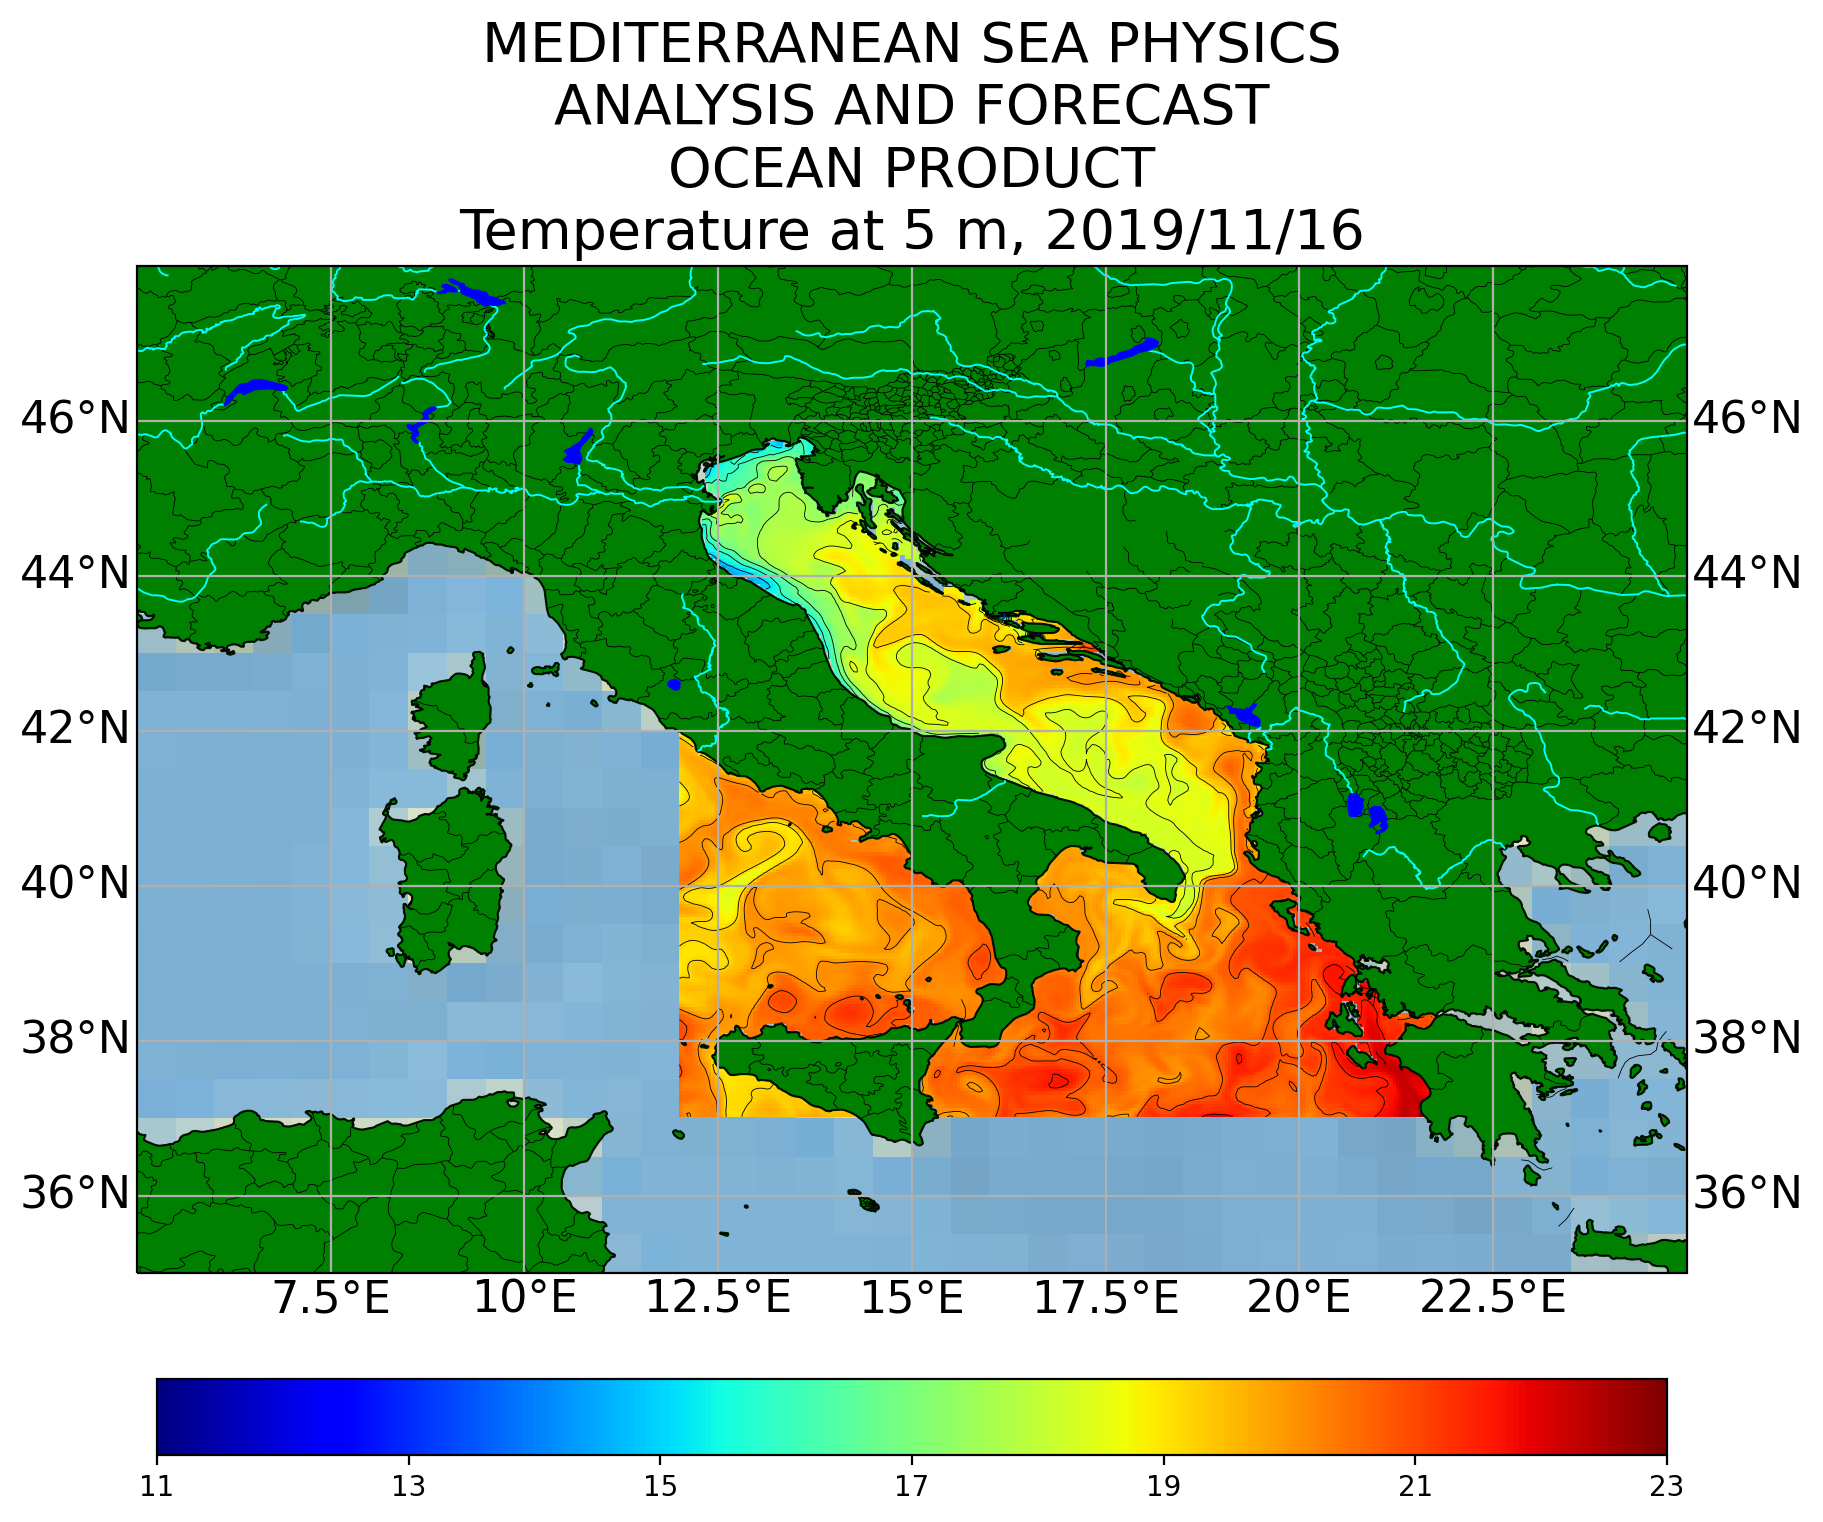

In [11]:
def main():
    m = plt.axes(projection=ccrs.PlateCarree())
    f1 = plt.pcolormesh(lon_name,lat_name,np.ma.masked_invalid(t), shading='flat', vmin=11, vmax=23, cmap=plt.cm.jet)  
    
    lines=t.plot.contour(m=m,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=12)

    m.coastlines(resolution=land_resolution, color='black', linewidth=1)
    g1 = m.gridlines(draw_labels = True)
    g1.xlabels_top = False
    g1.xlabel_style = {'size': 16, 'color': 'k'}
    g1.ylabel_style = {'size': 16, 'color': 'k'}
    m.set_extent([5, 25, 35, 48])
    m.stock_img()

# feature creations

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
    
    boundry_lines = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='10m',
        facecolor='none')
##################################################################
##################################################################  
    
    m.add_feature(land_def,linewidth=0.5)
    m.add_feature(cfeature.COASTLINE,linewidths=0.5,alpha=0.9999)
    m.add_feature(cfeature.OCEAN,color='turquoise', linewidth=0.3)
    m.add_feature(boundry_lines, edgecolor='k', linewidth=0.3)
    m.add_feature(states_provinces, edgecolor='k', linewidth=0.3)
    m.add_feature(cfeature.RIVERS,color='aqua',linewidth=0.7)
    m.add_feature(cfeature.LAKES, color="b")


##################################################################
##################################################################
    cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07, ticks=[11,13,15,17,19,21,23]) 

    plt.title('MEDITERRANEAN SEA PHYSICS\nANALYSIS AND FORECAST\nOCEAN PRODUCT\nTemperature at 5 m, 2019/11/16', fontsize=20);    
    plt.savefig('temperature_november_2020_at5.png')

    plt.show()



fig4 = plt.figure(figsize=(10, 10), dpi=200)

if __name__ == '__main__':
    main()

In [15]:
from mpl_toolkits.basemap import Basemap
from numpy import linspace
from numpy import meshgrid



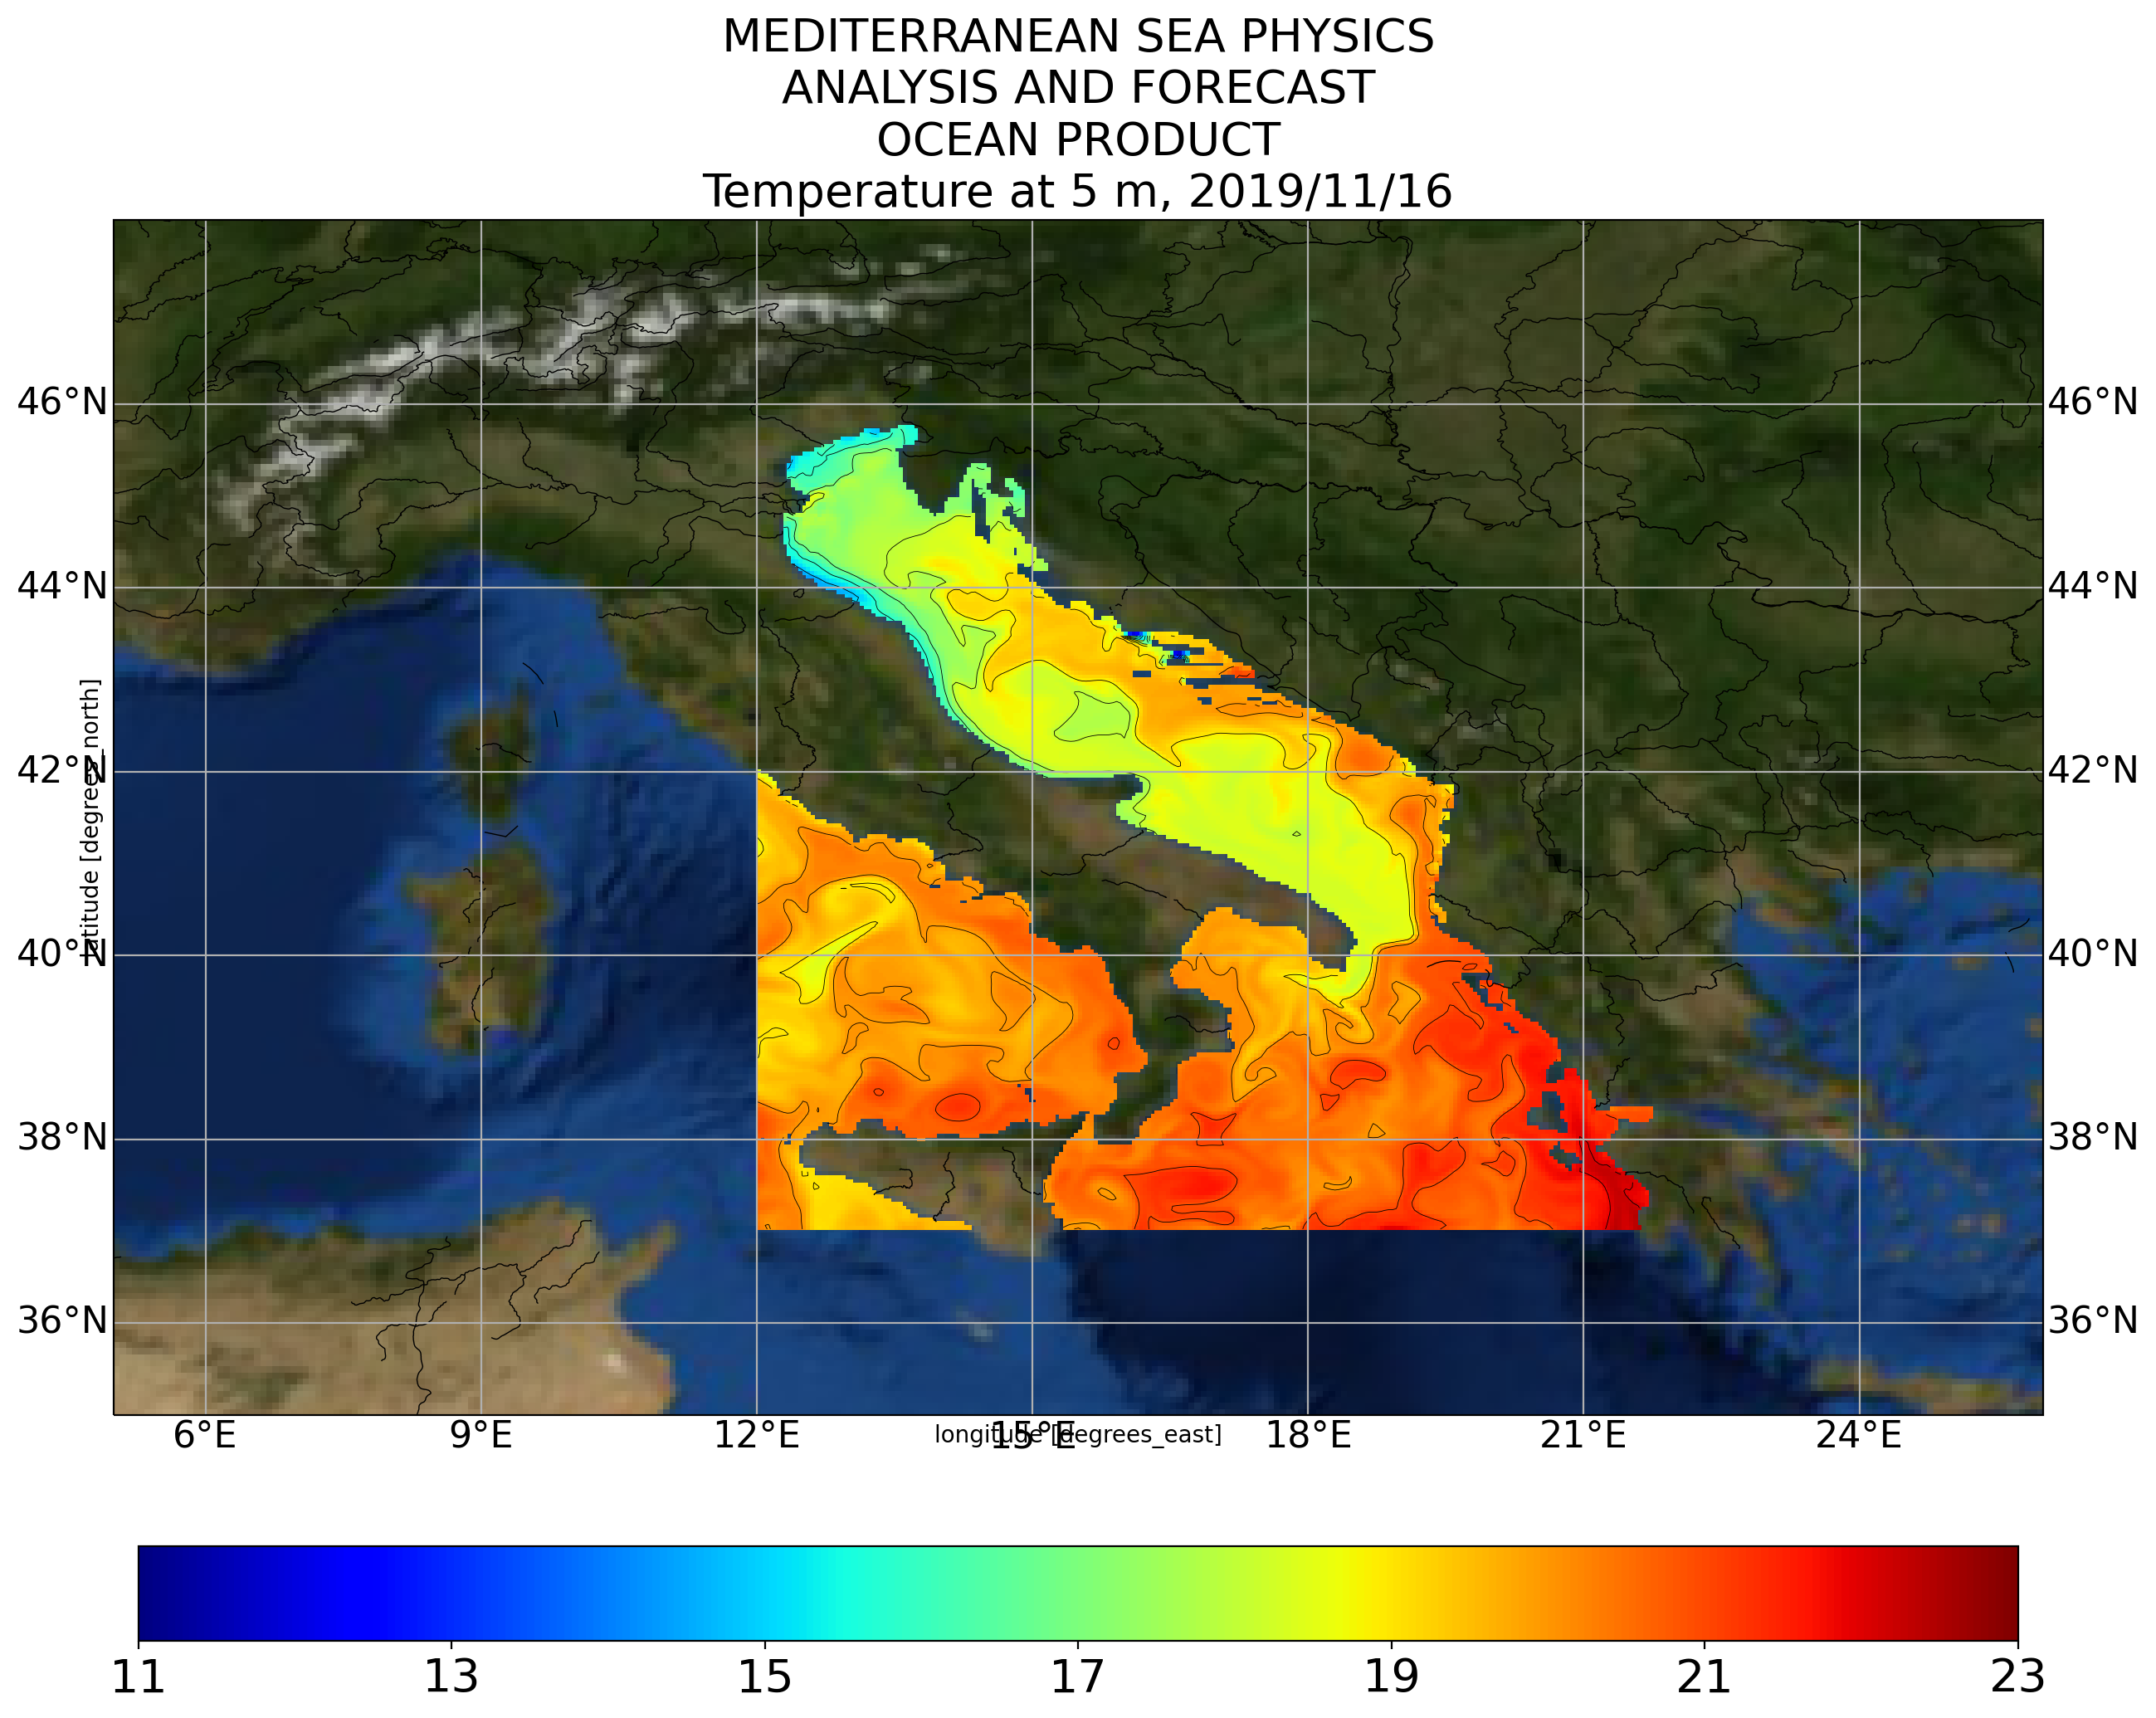

In [21]:
def main():

    
    k = plt.axes(projection=ccrs.PlateCarree())
    k.set_extent([12, 22, 37, 46])
    f1 = plt.pcolormesh(lon_name,lat_name,np.ma.masked_invalid(t), shading='flat', vmin=11, vmax=23, cmap=plt.cm.jet)  
    lines=t.plot.contour(k=k,alpha=1,linewidths=0.3,colors = 'k',linestyles='None',levels=12)

    k.stock_img()


    m = Basemap(projection='cyl', resolution='f', 
    llcrnrlat=35, urcrnrlat=48,
    llcrnrlon=5, urcrnrlon=26)

    #m.etopo(scale=0.9, alpha=0.9);   
    m.bluemarble(scale=0.9, alpha=0.9);     
    m.shadedrelief()
    m.drawcountries()
    m.drawcounties()
    m.drawrivers()
    m.drawstates()
   
    
    
    m.warpimage()
    g1 = k.gridlines(draw_labels = True)
    g1.xlabels_top = False
    g1.xlabel_style = {'size': 16, 'color': 'k'}
    g1.ylabel_style = {'size': 16, 'color': 'k'}
    cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07, ticks=[11,13,15,17,19,21,23]) 
    cbar.ax.set_xticklabels(['11','13','15','17','19','21','23'], fontsize=20) 
    #cbar.set_label('Temperature in C$', fontsize=20)
    plt.title('MEDITERRANEAN SEA PHYSICS\nANALYSIS AND FORECAST\nOCEAN PRODUCT\nTemperature at 5 m, 2019/11/16', fontsize=20);    
    plt.savefig('temperature_november_2020_at5_basemap.png')

fig7 = plt.figure(figsize=(15,15),dpi=200, edgecolor='w')
if __name__ == '__main__':
    main()